#### This notebook is used for reading in the data using the correct encoding, removing headers and footers, renaming columns, choosing the correct column types and saving the cleaned data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### construction cost data

In [103]:
construction_cost = pd.read_csv('../data/baukosten.csv', encoding = 'latin1', sep=';', decimal=',', header=7, skipfooter=4)
construction_cost.columns = ['year', 'total cost', 'material cost', 'labor cost']
construction_cost

<ipython-input-103-986205b29f6d>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  construction_cost = pd.read_csv('../data/baukosten.csv', encoding = 'latin1', sep=';', decimal=',', header=7, skipfooter=4)


,year,total cost,material cost,labor cost
0,2005,81.8,80.8,83.4
1,2006,83.8,84.3,82.8
2,2007,86.6,88.2,84.0
3,2008,89.5,90.9,87.2
4,2009,89.8,89.4,90.4
5,2010,91.8,92.1,91.5
6,2011,95.2,96.1,93.5
7,2012,97.1,97.7,96.2
8,2013,97.8,98.8,96.0
9,2014,98.7,99.7,97.1


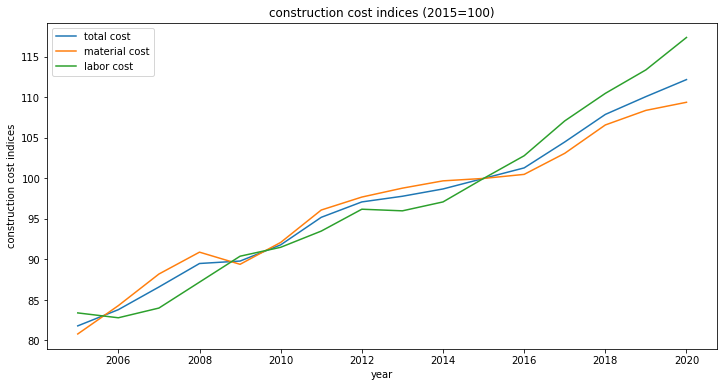

In [111]:
plt.figure(figsize=(12, 6))

for column in construction_cost.columns[1:]:

    plt.plot(construction_cost['year'], construction_cost[column], label=column)

plt.legend()
plt.xlabel('year')
plt.ylabel('construction cost indices')
plt.title('construction cost indices (2015=100)');

In [4]:
construction_cost.to_csv('../data/construction_cost.csv')

#### living space data

In [87]:
housing = pd.read_csv('../data/wohnungsbestand.csv', encoding = 'latin1', sep=';', decimal=',', header=7, skipfooter=4)
# we are only interested in the total living space in qm
housing = housing.iloc[:, [0, 1, -1]]
housing.columns = ['year', 'federal state', 'living space']
# only select year
housing.year = pd.to_datetime(housing.year, format='%d.%m.%Y').dt.year
housing

<ipython-input-87-1c51df612b4f>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  housing = pd.read_csv('../data/wohnungsbestand.csv', encoding = 'latin1', sep=';', decimal=',', header=7, skipfooter=4)


,year,federal state,living space
0,2005,Baden-Württemberg,434944
1,2005,Bayern,527736
2,2005,Berlin,130457
3,2005,Brandenburg,96526
4,2005,Bremen,26595
...,...,...,...
267,2020,Sachsen,175214
268,2020,Sachsen-Anhalt,101807
269,2020,Schleswig-Holstein,137589
270,2020,Thüringen,94875


compute living space indices (2015=100%), rearrange shape of dataframe

In [88]:
rearranged_housing = {}
rearranged_housing['year'] = housing['year'].unique()

fed_states = housing['federal state'].unique()

for fed_state in fed_states:
    state_mask = housing['federal state'] == fed_state
    year_mask = housing['year'] == 2015
    index_100 = housing[state_mask & year_mask]['living space'].item() / 100
    rearranged_housing[fed_state] = housing.loc[state_mask, 'living space'].divide(index_100, axis=0).values

housing = pd.DataFrame(rearranged_housing)

In [89]:
housing

,year,Baden-Württemberg,Bayern,Berlin,Brandenburg,Bremen,Hamburg,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Nordrhein-Westfalen,Rheinland-Pfalz,Saarland,Sachsen,Sachsen-Anhalt,Schleswig-Holstein,Thüringen,Insgesamt
0,2005,90.708767,89.814716,95.396777,89.606580,96.024697,89.591218,90.570132,90.789569,89.494610,90.033663,88.413553,94.382263,93.313191,95.174059,88.569492,94.378625,90.628352
1,2006,91.586982,90.828019,95.665146,90.315813,96.252166,90.193558,91.290477,91.343525,90.328342,90.694042,89.322142,94.894205,93.481890,95.261913,89.388078,94.560064,91.343932
2,2007,92.341943,91.664497,95.975927,90.687139,96.624061,90.686119,91.891902,91.830949,90.963024,91.322354,90.129024,95.375002,93.470134,95.350764,90.026956,94.652944,91.944716
3,2008,92.969061,92.357335,96.297678,91.047326,96.851531,91.227791,92.398119,92.214235,91.429977,91.802571,90.802716,95.707862,93.610030,95.402678,90.539429,94.817103,92.441301
4,2009,93.537993,92.970865,96.634053,91.470637,97.089832,91.759353,92.785776,92.620663,91.868715,92.228057,91.396011,96.011524,93.698788,95.436621,91.074746,94.934822,92.888580
5,2010,96.236457,95.777788,97.350679,96.567089,97.425621,96.276181,97.559092,96.990121,96.574734,97.420685,96.761336,98.228642,98.342993,99.334112,96.481983,98.224488,96.923127
6,2011,96.879008,96.503303,97.692904,97.045172,97.656701,96.744186,97.943515,97.503580,97.146259,97.872699,97.342038,98.542036,98.537555,99.375044,97.093448,98.469647,97.430282
7,2012,97.649402,97.258940,98.130192,97.709846,98.516031,97.268525,98.377159,98.177584,97.782236,98.363863,97.927100,98.863216,98.785018,99.520800,97.765070,98.807685,98.005868
8,2013,98.367658,98.104778,98.609161,98.382874,98.924032,98.177091,98.857508,98.757575,98.476193,98.891341,98.590137,99.248633,99.110071,99.556740,98.408516,99.152204,98.615287
9,2014,99.173088,99.036051,99.257781,99.195150,99.371750,99.030767,99.439173,99.370833,99.234084,99.476900,99.339384,99.634049,99.559150,99.758403,99.210350,99.587442,99.309891


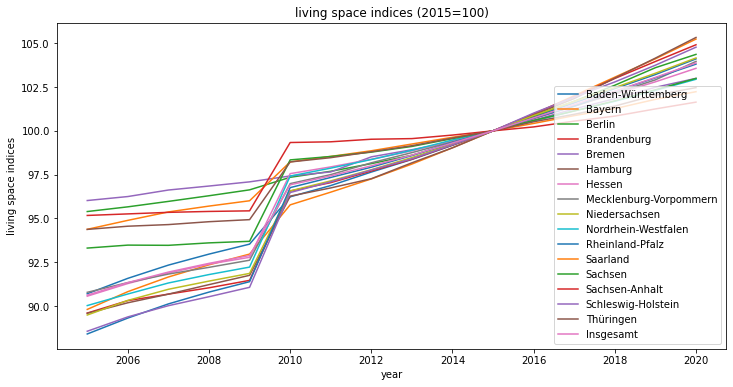

In [112]:
plt.figure(figsize=(12, 6))

for column in housing.columns[1:]:

    plt.plot(housing['year'], housing[column], label=column)
    
plt.legend()
plt.xlabel('year')
plt.ylabel('living space indices')
plt.title('living space indices (2015=100)');

In [91]:
housing.to_csv('../data/living_space.csv')

#### rent data

In [95]:
rent = pd.read_csv('../data/mieten.csv', encoding = 'latin1', sep=';', decimal=',', header=4, skipfooter=3)
rent = rent.rename(columns={rent.columns[0]: "year"})
rent

<ipython-input-95-f5d2936c13a5>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  rent = pd.read_csv('../data/mieten.csv', encoding = 'latin1', sep=';', decimal=',', header=4, skipfooter=3)


,year,Baden-Württemberg,Bayern,Berlin,Brandenburg,Bremen,Hamburg,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Nordrhein-Westfalen,Rheinland-Pfalz,Saarland,Sachsen,Sachsen-Anhalt,Schleswig-Holstein,Thüringen
0,2005,86.9,85.3,85.8,94.9,82.0,-,87.7,94.6,89.4,88.3,90.2,93.5,96.5,93.9,-,92.8
1,2006,88.1,87.0,87.0,95.4,83.5,-,88.7,94.8,90.0,89.2,90.8,94.3,96.7,94.1,-,93.2
2,2007,89.5,88.6,87.2,95.8,84.0,-,89.7,95.1,91.0,90.0,91.7,95.1,97.0,94.7,-,93.8
3,2008,91.1,90.2,89.1,96.1,85.2,-,91.0,95.7,92.0,90.8,92.9,95.6,97.1,95.3,-,95.6
4,2009,92.2,91.7,90.7,96.3,86.6,-,92.2,96.4,92.8,91.7,93.6,95.8,97.5,96.0,-,95.8
5,2010,93.4,93.2,91.9,96.8,88.2,-,93.2,96.9,93.7,92.9,94.3,96.4,97.6,96.7,-,96.3
6,2011,94.6,94.5,93.4,97.3,91.2,-,94.3,97.8,94.7,94.5,95.4,97.0,97.9,97.2,-,96.9
7,2012,95.5,95.8,95.0,98.1,92.9,-,95.7,98.3,95.7,95.8,96.3,97.8,98.3,97.9,-,97.6
8,2013,96.6,97.0,97.4,98.7,94.1,-,97.1,98.8,97.2,97.3,97.5,98.4,98.7,98.5,-,98.1
9,2014,98.1,98.4,99.1,99.6,97.5,-,98.6,99.3,98.7,99.0,98.9,99.1,99.3,99.3,-,98.9


take mean over years 2005 - 2014 and fill in the missing values for Hamburg and Schleswig-Holstein

In [96]:
rent_mean = rent.iloc[:10, 1:].mean(axis=1).values
rent.loc[:9, ['Hamburg', 'Schleswig-Holstein']] = rent_mean.reshape(-1, 1).repeat(2, axis=1)

<ipython-input-96-598b2ddd702d>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  rent_mean = rent.iloc[:10, 1:].mean(axis=1).values


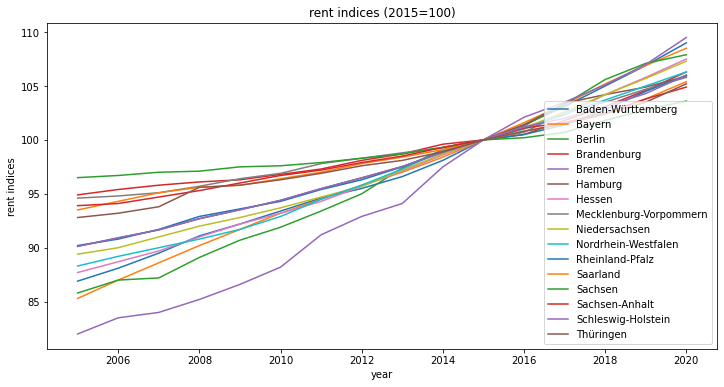

In [113]:
plt.figure(figsize=(12, 6))

for column in rent.columns[1:]:

    plt.plot(rent['year'], rent[column], label=column)
    
plt.legend()
plt.xlabel('year')
plt.ylabel('rent indices')
plt.title('rent indices (2015=100)');

In [98]:
rent.to_csv('../data/rent.csv')

#### population data

In [133]:
population = pd.read_csv('../data/bevoelkerung.csv', encoding = 'latin1', sep=';', decimal=',', header=5, skipfooter=4)
population = population.rename(columns={population.columns[0]: "year"})
# only select year
population.year = pd.to_datetime(population.year, format='%d.%m.%Y').dt.year
population

<ipython-input-133-5b5f3aa04bc5>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  population = pd.read_csv('../data/bevoelkerung.csv', encoding = 'latin1', sep=';', decimal=',', header=5, skipfooter=4)


,year,Baden-Württemberg,Bayern,Berlin,Brandenburg,Bremen,Hamburg,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Nordrhein-Westfalen,Rheinland-Pfalz,Saarland,Sachsen,Sachsen-Anhalt,Schleswig-Holstein,Thüringen
0,2005,10735701,12468726,3395189,2559483,663467,1743627,6092354,1707266,7993946,18058105,4058843,1050293,4273754,2469716,2832950,2334575
1,2006,10738753,12492658,3404037,2547772,663979,1754182,6075359,1693754,7982685,18028745,4052860,1043167,4249774,2441787,2834254,2311140
2,2007,10749755,12520332,3416255,2535737,663082,1770629,6072555,1679682,7971684,17996621,4045643,1036598,4220200,2412472,2837373,2289219
3,2008,10749506,12519728,3431675,2522493,661866,1772100,6064953,1664356,7947244,17933064,4028351,1030324,4192801,2381872,2834260,2267763
4,2009,10744921,12510331,3442675,2511525,661716,1774224,6061951,1651216,7928815,17872763,4012675,1022585,4168732,2356219,2832027,2249882
5,2010,10753880,12538696,3460725,2503273,660706,1786448,6067021,1642327,7918293,17845154,4003745,1017567,4149477,2335006,2834259,2235025
6,2011,10512441,12443372,3326002,2453180,652182,1718187,5993771,1606899,7774253,17544938,3990033,997855,4054182,2276736,2802266,2181603
7,2012,10569111,12519571,3375222,2449511,654774,1734272,6016481,1600327,7778995,17554329,3990278,994287,4050204,2259393,2806531,2170460
8,2013,10631278,12604244,3421829,2449193,657391,1746342,6045425,1596505,7790559,17571856,3994366,990718,4046385,2244577,2815955,2160840
9,2014,10716644,12691568,3469849,2457872,661888,1762791,6093888,1599138,7826739,17638098,4011582,989035,4055274,2235548,2830864,2156759


compute population indices (2015 = 100%)

In [134]:
index_100 = population.iloc[10, 1:].values / 100
population.iloc[:, 1:] = population.iloc[:, 1:].apply(lambda x: x/index_100, axis=1)
population

,year,Baden-Württemberg,Bayern,Berlin,Brandenburg,Bremen,Hamburg,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Nordrhein-Westfalen,Rheinland-Pfalz,Saarland,Sachsen,Sachsen-Anhalt,Schleswig-Holstein,Thüringen
0,2005,98.677187,97.081889,96.453384,103.004516,98.805342,97.550587,98.642881,105.886023,100.849633,101.077993,100.149033,105.493789,104.624477,109.986595,99.098756,107.548714
1,2006,98.705239,97.268224,96.704745,102.533216,98.881590,98.141107,98.367711,105.047998,100.707567,100.913654,100.001406,104.778038,104.037430,108.742802,99.144371,106.469116
2,2007,98.806364,97.483695,97.051844,102.048876,98.748006,99.061266,98.322310,104.175241,100.568781,100.733844,99.823332,104.118233,103.313438,107.437285,99.253476,105.459264
3,2008,98.804076,97.478992,97.489908,101.515881,98.566916,99.143564,98.199224,103.224710,100.260452,100.378092,99.396664,103.488058,102.642691,106.074541,99.144580,104.470833
4,2009,98.761933,97.405827,97.802406,101.074482,98.544578,99.262396,98.150618,102.409757,100.027957,100.040564,99.009870,102.710735,102.053465,104.932108,99.066468,103.647095
5,2010,98.844279,97.626678,98.315185,100.742386,98.394166,99.946291,98.232708,101.858454,99.895214,99.886026,98.789529,102.206716,101.582090,103.987406,99.144545,102.962666
6,2011,96.625093,96.884482,94.487861,98.726430,97.124748,96.127297,97.046698,99.661180,98.078041,98.205605,98.451195,100.226799,99.249202,101.392403,98.025406,100.501632
7,2012,97.145975,97.477770,95.886144,98.578774,97.510756,97.027204,97.414402,99.253580,98.137865,98.258170,98.457241,99.868421,99.151817,100.620048,98.174599,99.988299
8,2013,97.717383,98.137036,97.210195,98.565976,97.900487,97.702483,97.883041,99.016536,98.283753,98.356275,98.558109,99.509942,99.058326,99.960231,98.504258,99.545127
9,2014,98.502025,98.816944,98.574388,98.915256,98.570193,98.622754,98.667718,99.179837,98.740191,98.727056,98.982901,99.340898,99.275934,99.558133,99.025786,99.357124


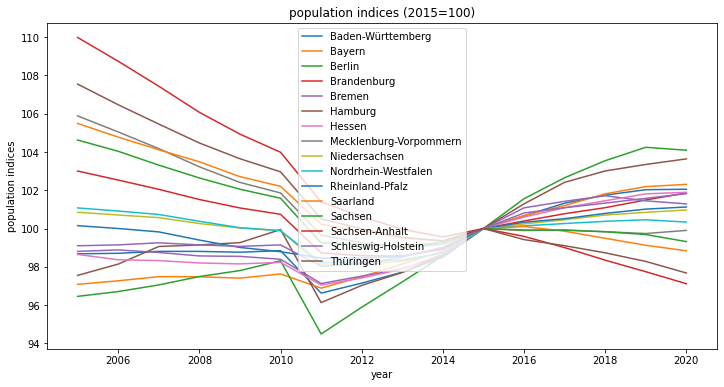

In [136]:
plt.figure(figsize=(12, 6))

for column in population.columns[1:]:

    plt.plot(population['year'], population[column], label=column)
    
plt.legend()
plt.xlabel('year')
plt.ylabel('population indices')
plt.title('population indices (2015=100)');

In [135]:
population.to_csv('../data/population.csv')

#### income data

In [140]:
income = pd.read_csv('../data/einkommen.csv', encoding = 'latin1', sep=';', decimal=',', header=7, skipfooter=4)
# population = population.rename(columns={population.columns[0]: "year"})
# only select income for all types of employment
income = income.iloc[:, [0, 1, -1]]

<ipython-input-140-490d3f187aa2>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  income = pd.read_csv('../data/einkommen.csv', encoding = 'latin1', sep=';', decimal=',', header=7, skipfooter=4)


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Erwerbstätige,Nichterwerbstätige,Arbeitslose,Rentner und Pensionäre,Sonstige Nichterwerbstätige,Insgesamt
0,2008,Erfasste Personen ab 16 Jahren,Anzahl,11786.0,12171.0,1194.0,7102.0,3875.0,24336.0
1,2008,Hochgerechnete Personen ab 16 Jahren,1000,34884.0,33300.0,4036.0,17355.0,11909.0,69176.0
2,2008,Nettoäquivalenzeinkommen (Median) v.Pers. ab 1...,EUR/Jahr,20919.0,15522.0,9999.0,15924.0,16427.0,18189.0
3,2008,Armutsgefährdungsquote von Personen ab 16 Jahren,Prozent,7.1,22.5,56.8,15.0,21.7,14.6
4,2009,Erfasste Personen ab 16 Jahren,Anzahl,11939.0,11708.0,1059.0,6734.0,3915.0,23832.0
5,2009,Hochgerechnete Personen ab 16 Jahren,1000,35296.0,33235.0,3698.0,17367.0,12170.0,69108.0
6,2009,Nettoäquivalenzeinkommen (Median) v.Pers. ab 1...,EUR/Jahr,21506.0,15785.0,9600.0,16423.0,16433.0,18549.0
7,2009,Armutsgefährdungsquote von Personen ab 16 Jahren,Prozent,6.8,23.4,61.9,14.9,23.8,14.9
8,2010,Erfasste Personen ab 16 Jahren,Anzahl,11972.0,11377.0,1040.0,6610.0,3727.0,23531.0
9,2010,Hochgerechnete Personen ab 16 Jahren,1000,35756.0,32731.0,3752.0,17465.0,11514.0,69022.0
